In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

import tensorflow as tf
from tensorflow.keras import layers

2023-09-22 15:27:36.092111: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 15:27:36.134521: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 15:27:36.135054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 15:27:36.887415: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")

x_train = x_train/255
x_test = x_test/255

In [3]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')
])

In [4]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)

In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 96s 302ms/step - loss: 4.2406 - accuracy: 0.0503 - val_loss: 3.8446 - val_accuracy: 0.1003
Epoch 2/10
313/313 [==============================] - 97s 310ms/step - loss: 3.6517 - accuracy: 0.1394 - val_loss: 3.4793 - val_accuracy: 0.1752
Epoch 3/10
313/313 [==============================] - 97s 311ms/step - loss: 3.2938 - accuracy: 0.2016 - val_loss: 3.1185 - val_accuracy: 0.2382
Epoch 4/10
313/313 [==============================] - 95s 305ms/step - loss: 3.0185 - accuracy: 0.2535 - val_loss: 2.9478 - val_accuracy: 0.2642
Epoch 5/10
313/313 [==============================] - 95s 302ms/step - loss: 2.8365 - accuracy: 0.2915 - val_loss: 2.7656 - val_accuracy: 0.3113
Epoch 6/10
313/313 [==============================] - 95s 302ms/step - loss: 2.6600 - accuracy: 0.3239 - val_loss: 2.6763 - val_accuracy: 0.3286
Epoch 7/10
313/313 [==============================] - 96s 308ms/step - loss: 2.5249 - accuracy: 0.3509 - val_loss: 2.5383 - val_ac

In [7]:
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=1)

313/313 [==============================] - 6s 20ms/step


66


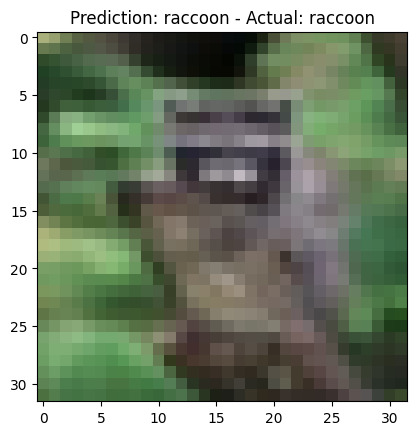

In [15]:
index = r.randint(0, len(y_test))

labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter',
    'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

plt.imshow(x_test[index])
print(np.argmax(y_test[index]))
plt.title(f"Prediction: {labels[predictions[index]]} - Actual: {labels[np.argmax(y_test[index])]}")
plt.show()